In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd

file_path = 'Bike Sales Dashboard.xlsx'

sheet_name = 'bike_buyers'
df = pd.read_excel(file_path, sheet_name=sheet_name)

print(df)

        ID Martial Status  Gender  Income  Children        Education  \
0    12496        Married  Female   40000         1        Bachelors   
1    24107        Married    Male   30000         3  Partial College   
2    14177        Married    Male   80000         5  Partial College   
3    24381         Single    Male   70000         0        Bachelors   
4    25597         Single    Male   30000         0        Bachelors   
..     ...            ...     ...     ...       ...              ...   
995  23731        Married    Male   60000         2      High School   
996  28672         Single    Male   70000         4  Graduate Degree   
997  11809        Married    Male   60000         2        Bachelors   
998  19664         Single    Male  100000         3        Bachelors   
999  12121         Single    Male   60000         3      High School   

         Occupation Home Owner  Cars    Commute Distance         Region  Age  \
0    Skilled Manual        Yes     0           0-1 Mile

In [3]:
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [4]:
for col in df.columns:
    print(col, df[col].nunique())

ID 1000
Martial Status 2
Gender 2
Income 16
Children 6
Education 5
Occupation 5
Home Owner 2
Cars 5
Commute Distance 5
Region 3
Age 53
Age Brackets 3
Purchased Bike 2


In [5]:
columns=["Martial Status","Gender","Children","Education","Occupation","Home Owner","Cars","Commute Distance","Age Brackets","Region","Purchased Bike"]

for col in columns:
    print(col, df[col].unique())

Martial Status ['Married' 'Single']
Gender ['Female' 'Male']
Children [1 3 5 0 2 4]
Education ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner ['Yes' 'No']
Cars [0 1 2 4 3]
Commute Distance ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' 'More than 10 Miles']
Age Brackets ['Middle Age' 'Old' 'Adolescent']
Region ['Europe' 'Pacific' 'North America']
Purchased Bike ['No' 'Yes']


In [6]:
# Define ordinal mappings
ordinal_mappings = {
    'Occupation': {'Clerical': 0, 'Manual': 1, 'Skilled Manual': 2, 'Management': 3, 'Professional': 4},
    'Education': {'Partial High School': 0, 'High School': 1, 'Partial College': 2, 'Bachelors': 3, 'Graduate Degree': 4},
    'Commute Distance': {'0-1 Miles': 0, '1-2 Miles': 1, '2-5 Miles': 2, '5-10 Miles': 3, 'More than 10 Miles': 4},
    'Age Brackets': {'Adolescent': 0, 'Middle Age': 1, 'Old': 2}
}

In [7]:
# Function to map ordinal values
def map_ordinal_values(df, mappings):
    for column, mapping in mappings.items():
        if column in df.columns:
            df[column] = df[column].map(mapping)
    return df

from sklearn.preprocessing import LabelEncoder
# Function for label encoding
def label_encode_columns(df, columns):
    labelencoder = LabelEncoder()
    for column in columns:
        if column in df.columns:
            df[column] = labelencoder.fit_transform(df[column])
    return df

In [8]:
# Apply ordinal mappings
df = map_ordinal_values(df, ordinal_mappings)

# Columns to label encode
label_encode_cols = ['Martial Status', 'Gender', 'Home Owner', 'Region', 'Purchased Bike']

# Apply label encoding
df = label_encode_columns(df, label_encode_cols)

In [9]:
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,0,0,40000,1,3,2,1,0,0,0,42,1,0
1,24107,0,1,30000,3,2,0,1,1,0,0,43,1,0
2,14177,0,1,80000,5,2,4,0,2,2,0,60,2,0
3,24381,1,1,70000,0,3,4,1,1,3,2,41,1,1
4,25597,1,1,30000,0,3,0,0,0,0,0,36,1,1


In [10]:
df.isna().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [11]:
df = df.drop(['ID','Age Brackets'], axis=1)

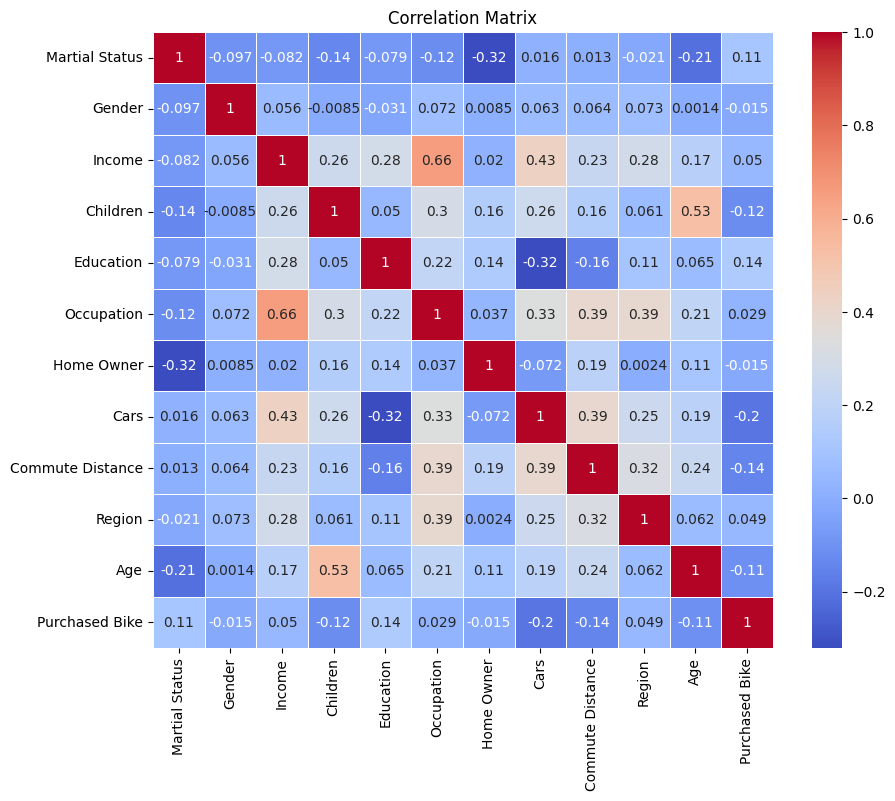

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


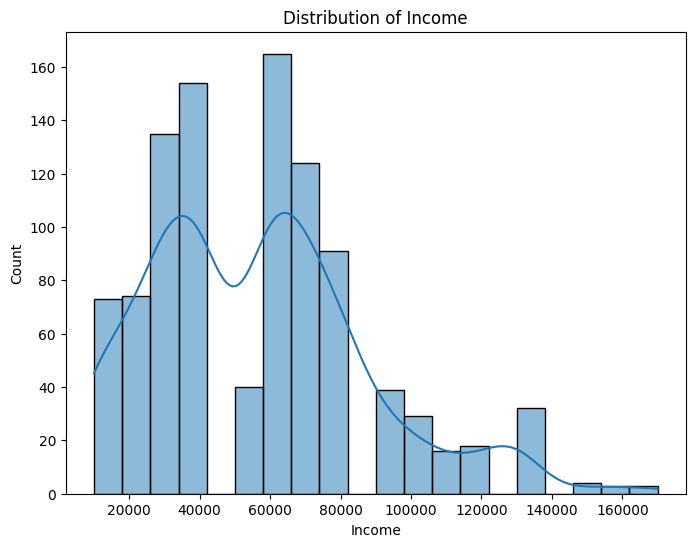

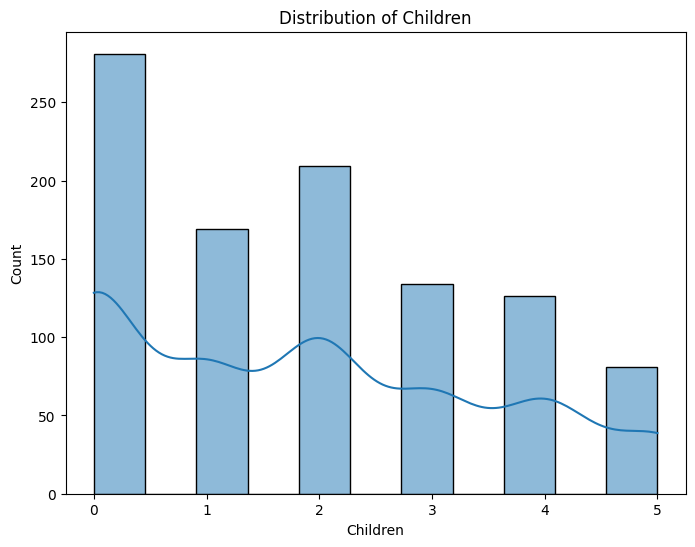

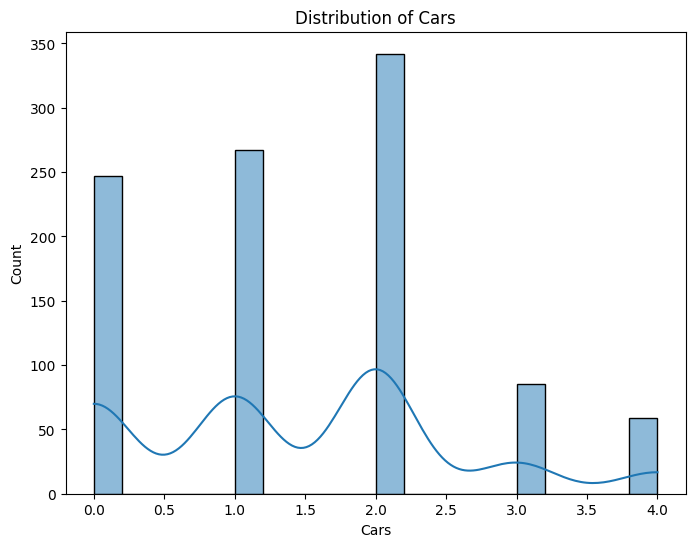

In [13]:
numerical_cols = ['Income', 'Children', 'Cars']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased Bike', axis=1)
y = df['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the improved model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               6144      
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [24]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
25/25 [==============================] - 1s 15ms/step - loss: 0.9257 - accuracy: 0.5500 - val_loss: 0.6898 - val_accuracy: 0.5400
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 0.8736 - accuracy: 0.5775 - val_loss: 0.6955 - val_accuracy: 0.5050
Epoch 3/200
25/25 [==============================] - 0s 10ms/step - loss: 0.8614 - accuracy: 0.5775 - val_loss: 0.7021 - val_accuracy: 0.5100
Epoch 4/200
25/25 [==============================] - 0s 9ms/step - loss: 0.8093 - accuracy: 0.5788 - val_loss: 0.7038 - val_accuracy: 0.5050
Epoch 5/200
25/25 [==============================] - 0s 10ms/step - loss: 0.7673 - accuracy: 0.6112 - val_loss: 0.6934 - val_accuracy: 0.5400
Epoch 6/200
25/25 [==============================] - 0s 9ms/step - loss: 0.7574 - accuracy: 0.5975 - val_loss: 0.6956 - val_accuracy: 0.5300
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.7455 - accuracy: 0.5962 - val_loss: 0.7098 - val_accuracy: 0.5300
Epoch 8/20

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

7/7 [==============================] - 0s 8ms/step - loss: 0.8258 - accuracy: 0.6800
Loss: 0.8258170485496521, Accuracy: 0.6800000071525574


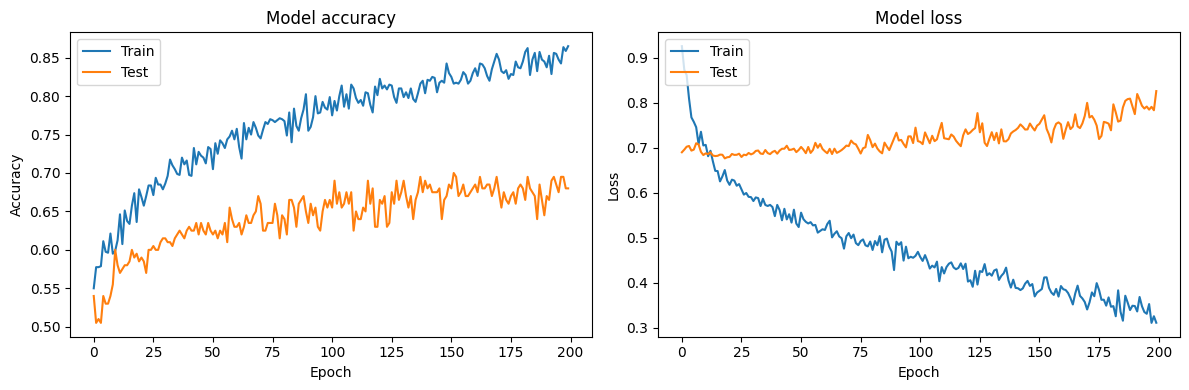

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()